In [1]:

import src.MCTS as MCTS
from src.Environments import StatelessGym
from src.Experiment import Experiment, RandomExperiment, ParametrizedRandomExperiment
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.metrics import median_absolute_error, mean_squared_log_error, max_error
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, mean_tweedie_deviance
from sklearn.preprocessing import OneHotEncoder
import ast

In [2]:
def encode_maze(maze):
    num_rows = len(maze)
    num_cols = len(maze[0])

    encoded_maze = []

    for i in range(num_rows):
        for j in range(num_cols):
            if maze[i][j] == 'S':
                encoded_maze.append(0)
            elif maze[i][j] == 'F':
                encoded_maze.append(1)
            elif maze[i][j] == 'H':
                encoded_maze.append(2)
            elif maze[i][j] == 'G':
                encoded_maze.append(3)
            elif maze[i][j] == 'E':
                encoded_maze.append(4)
    return encoded_maze

def add_padding(map, target_size):
    current_size = len(map)
    diff = target_size - current_size
    if diff < 0:
        raise Exception("Current map size is greater than target size")
    elif diff == 0:
        return map
    else:
        result = []
        padding = diff // 2
        left_out = diff % 2
        for i in range(padding):
            result.append('E' * target_size)
        for row in map:
            new_row = 'E' * padding + row + 'E' * padding + 'E' * left_out
            result.append(new_row)
        for i in range(padding + left_out):
            result.append('E' * target_size)
        return result
            

In [26]:
import ast
directory = "../datasets/FrozenLake-v1_m4-7_s1-200_t1/"
dataset_names = os.listdir(directory)
dataset = pd.DataFrame()
print (dataset_names)

for dataset_name in dataset_names:
    dataset = dataset.append(pd.read_csv(directory + dataset_name), ignore_index=True)
    
padding = 10

if 'Map' in dataset.columns:
    if padding > 0: 
        dataset['List_Map'] = dataset['Map'].apply(ast.literal_eval).apply(lambda x: add_padding(x, padding))
    else: 
        dataset['List_Map'] = dataset['Map'].apply(ast.literal_eval)
    #dataset['F_count'] = dataset['Map'].apply(lambda x: sum(row.count('F') for row in x))
    dataset['Encoded_Map'] = dataset['List_Map'].apply(lambda x: encode_maze(x))
print(dataset)
dataset.describe()

['Parametrized_Cluste2r_10_1000_s1-100_t1_m5-5_FrozenLake-v1.csv', 'Parametrized_Cluste2r_1_1000_s1-100_t1_m5-5_FrozenLake-v1.csv', 'Parametrized_Cluste2r_2_1000_s1-100_t1_m5-5_FrozenLake-v1.csv', 'Parametrized_Cluste2r_3_1000_s1-100_t1_m5-5_FrozenLake-v1.csv', 'Parametrized_Cluste2r_4_1000_s1-100_t1_m5-5_FrozenLake-v1.csv', 'Parametrized_Cluste2r_5_1000_s1-100_t1_m5-5_FrozenLake-v1.csv', 'Parametrized_Cluste2r_6_1000_s1-100_t1_m5-5_FrozenLake-v1.csv', 'Parametrized_Cluste2r_7_1000_s1-100_t1_m5-5_FrozenLake-v1.csv', 'Parametrized_Cluste2r_8_1000_s1-100_t1_m5-5_FrozenLake-v1.csv', 'Parametrized_Cluste2r_9_1000_s1-100_t1_m5-5_FrozenLake-v1.csv', 'Parametrized_Cluster_10_10000_s1-100_t1_m4-4_FrozenLake-v1.csv', 'Parametrized_Cluster_10_1000_s1-100_t1_m4-4_FrozenLake-v1.csv', 'Parametrized_Cluster_10_1000_s1-100_t1_m6-6_FrozenLake-v1.csv', 'Parametrized_Cluster_10_1000_s1-100_t1_m7-7_FrozenLake-v1.csv', 'Parametrized_Cluster_10_1000_s100-200_t1_m6-6_FrozenLake-v1.csv', 'Parametrized_Cluste

Temperature    Simulations         Return  Discounted Return
count     220700.0  220700.000000  220700.000000      220700.000000
mean           1.0      61.477884       0.588962           0.553340
std            0.0      42.486247       0.492023           0.464025
min            1.0       1.000000       0.000000           0.000000
25%            1.0      29.000000       0.000000           0.000000
50%            1.0      57.000000       1.000000           0.886760
75%            1.0      85.000000       1.000000           0.967491
max            1.0     200.000000       1.000000           0.985090

In [6]:
models = {
    #'LinearRegression': LinearRegression(),
    # #'Ridge': Ridge(alpha=1.0),
    # #'Lasso': Lasso(alpha=1.0),
    # #'ElasticNet':  ElasticNet(alpha=1.0, l1_ratio=0.5),
    #'SVR': SVR(),
    #'DecisionTreeRegressor': DecisionTreeRegressor(),
    #'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(n_estimators=100),
    #'KNeighborsRegressor': KNeighborsRegressor(n_neighbors=5),
    #'MLPRegressor': MLPRegressor(hidden_layer_sizes=(10, 10, 10), activation='tanh', max_iter=100000, n_iter_no_change=100, tol=1e-6)
}

## Without Maps

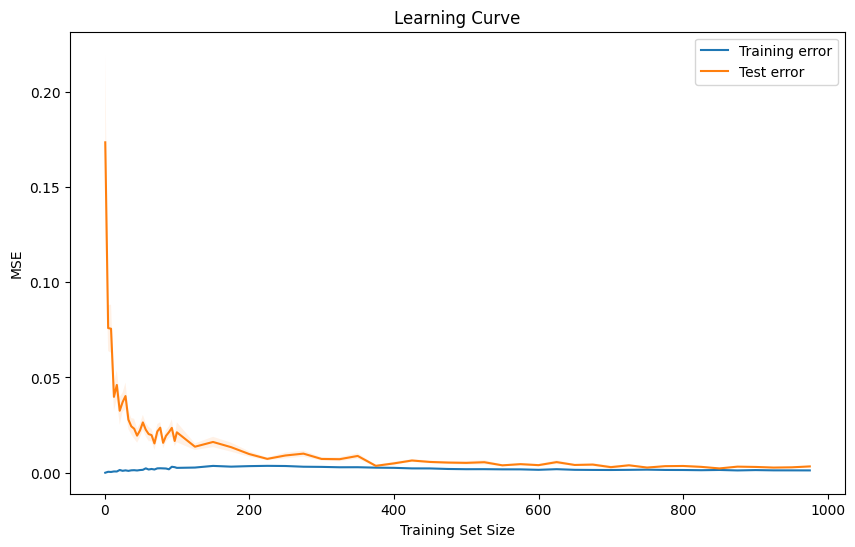

[0.         0.00049266 0.00039608 0.00066905 0.00063966 0.00143354
 0.00099888 0.00124177 0.00096779 0.00126253 0.00132894 0.00117714
 0.00140256 0.00152197 0.0022988  0.00168657 0.00196592 0.00168443
 0.00228825 0.00233818 0.00227468 0.00221149 0.0018067  0.00311942
 0.00291085 0.00255017 0.00271437 0.00357737 0.00319059 0.00346191
 0.00360987 0.00352328 0.00314804 0.00306211 0.00285924 0.00288556
 0.00266191 0.00256568 0.00227298 0.00225459 0.00196663 0.00184622
 0.00186032 0.0017713  0.00176103 0.00152928 0.00185464 0.00152927
 0.00146273 0.00143129 0.00150804 0.00161521 0.00145599 0.00142505
 0.00131927 0.00144718 0.00120275 0.00138271 0.00124586 0.00123481
 0.00121631]
[0.17346698 0.07594027 0.07559772 0.03983414 0.0460892  0.03253723
 0.03707117 0.04025653 0.02786148 0.02435624 0.02308405 0.01947354
 0.02217456 0.02640961 0.02259211 0.02029221 0.01974973 0.01538076
 0.02167785 0.02364829 0.01569283 0.01936165 0.02128056 0.02354391
 0.01665804 0.02121314 0.01366066 0.01614757 0.01

In [58]:
#Getting min and max number of simulations
sim_min = dataset['Simulations'].min()
sim_max = dataset['Simulations'].max()

#Features to be used in the model
features = ['Simulations']

#Folds
fold = 25

train_sizes = list(range(1, 100, 4)) + list(range(100, 1000, 25))
train_scores = []
test_scores = []
for training_set_size in  train_sizes:
    train_scores.append([])
    test_scores.append([])
    
    for i in range(fold):
        #Randomly sampling number of simulations to be included in the test and training set
        test_sims = np.sort(np.random.choice(np.arange(sim_min, sim_max + 1), size=(sim_max - sim_min + 1) // 5, replace=False))
        #training_sims = np.setdiff1d(np.arange(sim_min, sim_max + 1), test_sims)

        #Creating test set by taking average for test set simulations
        test_set_x = test_sims.reshape(-1, len(features))
        test_set_y = dataset.loc[dataset['Simulations'].isin(test_sims)].groupby(['Simulations']).mean()['Discounted Return'].values
        
        #Creating training set by sampling sim numbers for training set from the remainnig datapoints
        training_set = dataset[dataset['Simulations'].isin(test_sims).apply(lambda x: not x)].sample(n=training_set_size, replace=False)
        
        training_set_x = training_set[features].values.reshape(-1, len(features))
        training_set_y = training_set['Discounted Return'].values
        
        #Creating training score sets
        training_score_set = training_set.groupby(['Simulations']).mean()['Discounted Return']
        training_score_set_x = training_score_set.index.values.reshape(-1, len(features))
        training_score_set_y = training_score_set.values
        
        # print(test_sims)
        # print(training_score_set)
        # print(training_score_set_x.shape)
        # print(training_score_set_y.shape)

        #Training
        for model_name, model in models.items():
            model.fit(training_set_x, training_set_y)
            #Predicting on test set
            y_pred = model.predict(test_set_x)
            #Calculating MSE
            test_score = mean_squared_error(test_set_y, y_pred)
            test_scores[-1].append(test_score)
            #Predicting on training set
            y_pred = model.predict(training_score_set_x)
            train_score = mean_squared_error(training_score_set_y, y_pred)
            train_scores[-1].append(train_score)
        
# Calculate the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1) / np.sqrt(fold)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1) / np.sqrt(fold)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training error')
plt.plot(train_sizes, test_mean, label='Test error')

# Add error bands showing the standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

# Add labels and title
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.title('Learning Curve')
plt.legend(loc='best')
#plt.ylim([0, 1])
plt.show()

print(train_mean)
print(test_mean)

## With Different Maps

In [180]:
#Unique maps
unique_maps = []
for map in dataset["Map"].unique():
    unique_maps.append(map)
map_count = len(unique_maps)
test_maps = np.random.default_rng().choice(unique_maps, size=map_count//5, replace=False)

#Creating Test Set
test_set = dataset[dataset['Map'].isin(test_maps)].groupby(["Map", "Simulations"]).mean()["Discounted Return"]
test_set_x = []
test_set_y = []
for i in range(len(test_set)):
    test_set_x.append([test_set.index[i][1]] + encode_maze(test_set.index[i][0]))
    test_set_y.append(test_set[i])

#Creating Training Set
training_set = dataset[~dataset['Map'].isin(test_maps)]
training_set_x = np.append(training_set["Simulations"].values.reshape(-1, 1), training_set['Encoded_Map'].apply(pd.Series).values, axis=1)
training_set_y = training_set["Discounted Return"].values

#Creating Training Score Set
training_score_set = training_set.groupby(["Map", "Simulations"]).mean()["Discounted Return"]
training_score_set_x = []
training_score_set_y = []
for i in range(len(training_score_set)):
    training_score_set_x.append([training_score_set.index[i][1]] + encode_maze(training_score_set.index[i][0]))
    training_score_set_y.append(training_score_set[i])

#test_set.describe()
print(training_score_set_x)
print(len(test_set_y))

[[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3], [2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3], [3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3], [4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3], [5, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3], [6, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3], [7, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3], [8, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3], [9, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3], [10, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3], [11, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3], [12, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3], [13, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3], [14, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3], [15, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3], [16, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3], [17, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3], [18, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3], [19, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

Training set size: 1
Training error: 0.000000
Test error: 0.446013

Training set size: 9
Training error: 0.000000
Test error: 0.243983

Training set size: 17
Training error: 0.000001
Test error: 0.224166

Training set size: 25
Training error: 0.000003
Test error: 0.225319

Training set size: 33
Training error: 0.000052
Test error: 0.192557

Training set size: 41
Training error: 0.000279
Test error: 0.190463

Training set size: 49
Training error: 0.000796
Test error: 0.168474

Training set size: 57
Training error: 0.001840
Test error: 0.169485

Training set size: 65
Training error: 0.002366
Test error: 0.159879

Training set size: 73
Training error: 0.001764
Test error: 0.148754

Training set size: 81
Training error: 0.002196
Test error: 0.137197

Training set size: 89
Training error: 0.004881
Test error: 0.129832

Training set size: 97
Training error: 0.006804
Test error: 0.148283

Training set size: 100
Training error: 0.006430
Test error: 0.137393

Training set size: 125
Training err

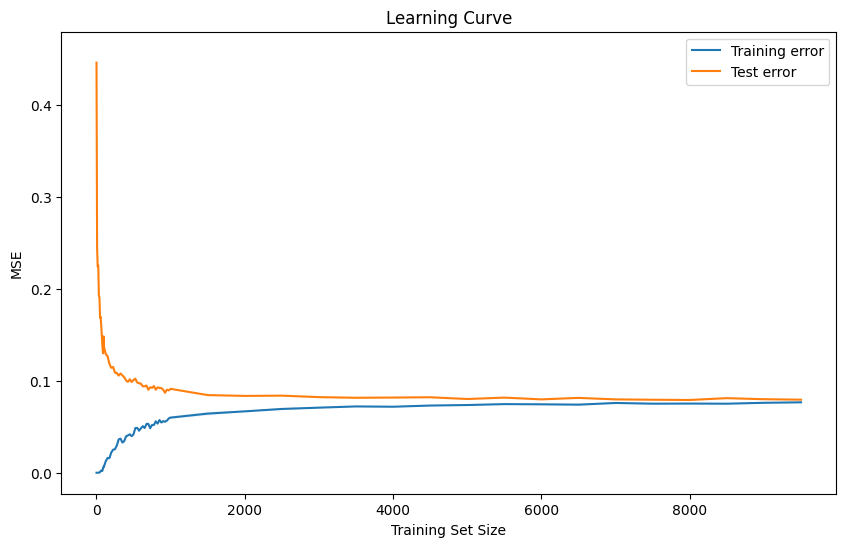

[0.00000000e+00 1.74595279e-10 6.69012634e-07 3.33169139e-06
 5.18659005e-05 2.78595586e-04 7.95924763e-04 1.83976581e-03
 2.36617019e-03 1.76403661e-03 2.19631935e-03 4.88115803e-03
 6.80441513e-03 6.43047966e-03 1.24156067e-02 1.60264663e-02
 1.59205583e-02 2.20031778e-02 2.50268217e-02 2.56596350e-02
 2.95809323e-02 3.62132396e-02 3.70641753e-02 3.28201756e-02
 3.44648864e-02 3.95231899e-02 4.06250547e-02 4.17628995e-02
 3.97622380e-02 4.17886209e-02 4.85992293e-02 4.87174538e-02
 4.57464035e-02 4.82923641e-02 5.06067925e-02 4.86839164e-02
 5.30062958e-02 5.30876481e-02 4.84249493e-02 5.19796743e-02
 5.19320519e-02 5.59107355e-02 5.34766603e-02 5.72976509e-02
 5.46633729e-02 5.60347675e-02 5.55053976e-02 5.66319135e-02
 5.90624384e-02 5.99490193e-02 6.42905312e-02 6.67545031e-02
 6.93531150e-02 7.07727481e-02 7.21035431e-02 7.17822914e-02
 7.30646178e-02 7.36256402e-02 7.46232766e-02 7.44079301e-02
 7.40415858e-02 7.58695971e-02 7.50941776e-02 7.52190664e-02
 7.50769817e-02 7.605553

In [32]:
#Getting min and max number of simulations
sim_min = dataset['Simulations'].min()
sim_max = dataset['Simulations'].max()

#Features to be used in the model
features = ['Simulations']

#Unique maps
unique_maps = []
for map in dataset["Map"].unique():
    unique_maps.append(map)
map_count = len(unique_maps)

#Folds
fold = 3

train_sizes = list(range(1, 100, 8)) + list(range(100, 1000, 25)) + list(range(1000, 10000, 500))
#train_sizes = [1, 25, 100]
train_scores = []
test_scores = []
for training_set_size in  train_sizes:
    train_scores.append([])
    test_scores.append([])
    
    for i in range(fold):
        #Creating Test Set
        test_maps = np.random.default_rng().choice(unique_maps, size=map_count//5, replace=False)
        test_set = dataset[dataset['Map'].isin(test_maps)].groupby(["Map", "Simulations"]).mean()["Discounted Return"]
        test_set_x = []
        test_set_y = []
        for i in range(len(test_set)):
            test_set_x.append([test_set.index[i][1]] + encode_maze(add_padding(ast.literal_eval(test_set.index[i][0]), padding)))
            test_set_y.append(test_set[i])

        #Creating Training Set
        training_set = dataset[~dataset['Map'].isin(test_maps)].sample(n=training_set_size, replace=False)
        training_set_x = np.append(training_set["Simulations"].values.reshape(-1, 1), training_set['Encoded_Map'].apply(pd.Series).values, axis=1)
        training_set_y = training_set["Discounted Return"].values

        #Creating Training Score Set
        training_score_set = training_set.groupby(["Map", "Simulations"]).mean()["Discounted Return"]
        training_score_set_x = []
        training_score_set_y = []
        for i in range(len(training_score_set)):
            training_score_set_x.append([training_score_set.index[i][1]] + encode_maze(add_padding(ast.literal_eval(training_score_set.index[i][0]), padding)))
            training_score_set_y.append(training_score_set[i])

        #Training
        for model_name, model in models.items():
            model.fit(training_set_x, training_set_y)
            #Predicting on test set
            y_pred = model.predict(test_set_x)
            #Calculating MSE
            test_score = mean_squared_error(test_set_y, y_pred)
            test_scores[-1].append(test_score)
            #Predicting on training set
            y_pred = model.predict(training_score_set_x)
            train_score = mean_squared_error(training_score_set_y, y_pred)
            train_scores[-1].append(train_score)
    print("Training set size: %d\nTraining error: %f\nTest error: %f\n" % (training_set_size, np.mean(train_scores[-1]), np.mean(test_scores[-1])))
        
# Calculate the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1) / np.sqrt(fold)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1) / np.sqrt(fold)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training error')
plt.plot(train_sizes, test_mean, label='Test error')

# Add error bands showing the standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

# Add labels and title
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.title('Learning Curve')
plt.legend(loc='best')
#plt.ylim([0, 1])
plt.show()

print(train_mean)
print(test_mean)